# 📝 Exercise M7.01

In this exercise we will define dummy classification baselines and use them as
reference to assess the relative predictive performance of a given model of
interest.

We illustrate those baselines with the help of the Adult Census dataset, using
only the numerical features for the sake of simplicity.

In [1]:
import pandas as pd

adult_census = pd.read_csv("../datasets/adult-census-numeric-all.csv")
data, target = adult_census.drop(columns="class"), adult_census["class"]

First, define a `ShuffleSplit` cross-validation strategy taking half of the
samples as a testing at each round. Let us use 10 cross-validation rounds.

In [2]:
from sklearn.model_selection import ShuffleSplit

cv = ShuffleSplit(n_splits=10, test_size=0.5, random_state=42)

print(f"Number of CV iterations: {cv.get_n_splits()}")

Number of CV iterations: 10


Next, create a machine learning pipeline composed of a transformer to
standardize the data followed by a logistic regression classifier.

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

model = make_pipeline(StandardScaler(), LogisticRegression())

Compute the cross-validation (test) scores for the classifier on this dataset.
Store the results pandas Series as we did in the previous notebook.

In [6]:
from sklearn.model_selection import cross_validate

cv_results = cross_validate(model, data, target, cv=cv, n_jobs=2)

logistic_regression_scores = pd.Series(
    cv_results["test_score"], name="Logistic Regression score"
)

print(logistic_regression_scores)

0    0.814176
1    0.814422
2    0.817043
3    0.815036
4    0.813890
5    0.813194
6    0.815159
7    0.815855
8    0.814750
9    0.812989
Name: Logistic Regression score, dtype: float64


Now, compute the cross-validation scores of a dummy classifier that constantly
predicts the most frequent class observed the training set. Please refer to
the online documentation for the [sklearn.dummy.DummyClassifier
](https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html)
class.

Store the results in a second pandas Series.

In [ ]:
from sklearn.dummy import DummyClassifier

dummy_most_frequent = DummyClassifier(strategy="most_frequent")

cv_results_dummy = cross_validate(
    dummy_most_frequent, data, target, cv=cv, n_jobs=2
)

dummy_most_frequent_scores = pd.Series(
    cv_results_dummy["test_score"], name="Dummy most frequent score"
)

print(dummy_most_frequent_scores)

0    0.762909
1    0.759224
2    0.763196
3    0.759797
4    0.758077
5    0.760943
6    0.763032
7    0.764547
8    0.760575
9    0.758159
Name: Dummy most frequent score, dtype: float64


Now that we collected the results from the baseline and the model, concatenate
the test scores as columns a single pandas dataframe.

In [8]:
import pandas as pd

all_scores = pd.concat(
    [logistic_regression_scores, dummy_most_frequent_scores],
    axis=1,
)

all_scores

,Logistic Regression score,Dummy most frequent score
0,0.814176,0.762909
1,0.814422,0.759224
2,0.817043,0.763196
3,0.815036,0.759797
4,0.813890,0.758077
5,0.813194,0.760943
6,0.815159,0.763032
7,0.815855,0.764547
8,0.814750,0.760575
9,0.812989,0.758159



Next, plot the histogram of the cross-validation test scores for both models
with the help of [pandas built-in plotting
function](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html#histograms).

What conclusions do you draw from the results?

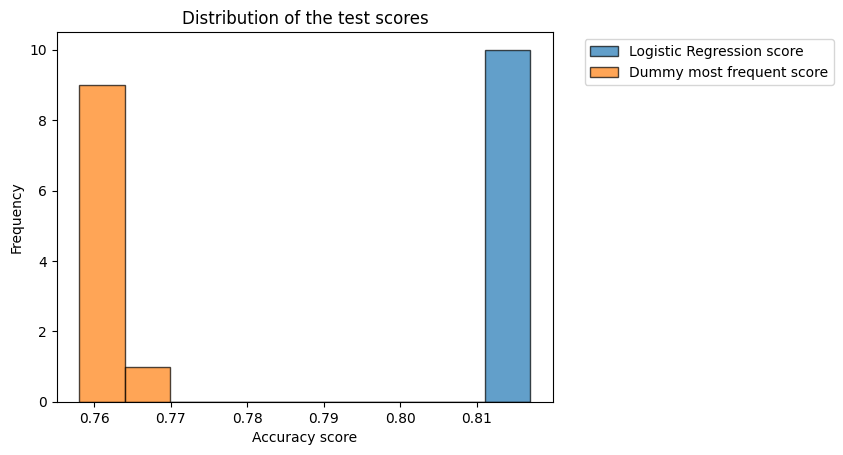

In [9]:
import matplotlib.pyplot as plt

all_scores.plot.hist(bins=10, edgecolor="black", alpha=0.7)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel("Accuracy score")
plt.ylabel("Frequency")
_ = plt.title("Distribution of the test scores")

Change the `strategy` of the dummy classifier to `"stratified"`, compute the
results. Similarly compute scores for `strategy="uniform"` and then the  plot
the distribution together with the other results.

Are those new baselines better than the previous one? Why is this the case?

Please refer to the scikit-learn documentation on
[sklearn.dummy.DummyClassifier](
https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html)
to find out about the meaning of the `"stratified"` and `"uniform"`
strategies.

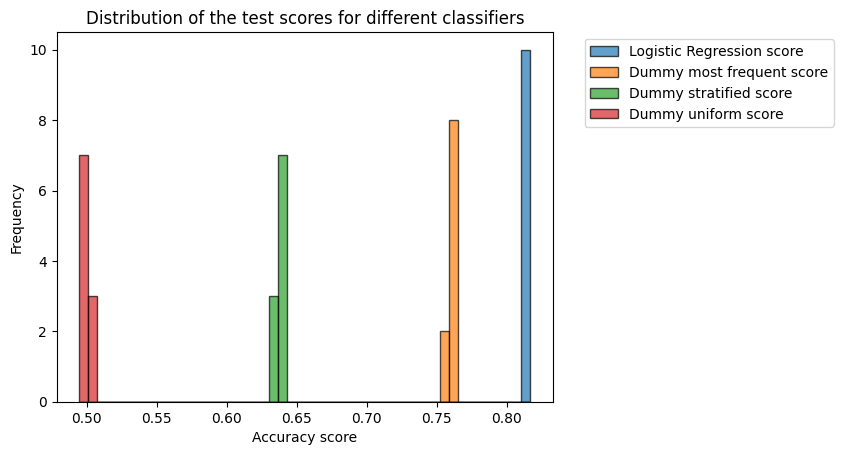

In [10]:
from sklearn.dummy import DummyClassifier

dummy_stratified = DummyClassifier(strategy="stratified")
cv_results_stratified = cross_validate(
    dummy_stratified, data, target, cv=cv, n_jobs=2
)
dummy_stratified_scores = pd.Series(
    cv_results_stratified["test_score"], name="Dummy stratified score"
)

dummy_uniform = DummyClassifier(strategy="uniform")
cv_results_uniform = cross_validate(
    dummy_uniform, data, target, cv=cv, n_jobs=2
)
dummy_uniform_scores = pd.Series(
    cv_results_uniform["test_score"], name="Dummy uniform score"
)

all_scores = pd.concat(
    [
        logistic_regression_scores,
        dummy_most_frequent_scores,
        dummy_stratified_scores,
        dummy_uniform_scores,
    ],
    axis=1,
)

import matplotlib.pyplot as plt

all_scores.plot.hist(bins=50, edgecolor="black", alpha=0.7)
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.xlabel("Accuracy score")
_ = plt.title("Distribution of the test scores for different classifiers")